In [2]:
#1 import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [3]:
#2. Read the dataframe
df=pd.read_csv("Week6_train.csv")

In [4]:
#3. print the shape of the dataframe
print(df.shape)

(42000, 785)


In [5]:
#4.take 10% sample data to train
sample_data=df.sample(frac=0.1)


In [6]:
#5. print shape of the selected dataset
print(sample_data.shape)

(4200, 785)


In [7]:
#6. Look at top five rows
print(sample_data.head())

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
10383      4       0       0       0       0       0       0       0       0   
23775      2       0       0       0       0       0       0       0       0   
29019      7       0       0       0       0       0       0       0       0   
38639      7       0       0       0       0       0       0       0       0   
41921      6       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
10383       0  ...         0         0         0         0         0   
23775       0  ...         0         0         0         0         0   
29019       0  ...         0         0         0         0         0   
38639       0  ...         0         0         0         0         0   
41921       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
10383         0         0   

In [8]:
#7 print number of unique class labels
print("Unique classes:", df['label'].nunique())





Unique classes: 10


In [9]:
#8 print number of examples for each class label
print(df['label'].value_counts())

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


In [10]:
#9 prepare x and y
X = df.drop(columns=['label'])  # Drop the label column, keep only pixel values
Y = df['label']  # Target values (digits)

# Check the shape of X and y
print("X shape:", X.shape)
print("y shape:", Y.shape)

X shape: (42000, 784)
y shape: (42000,)


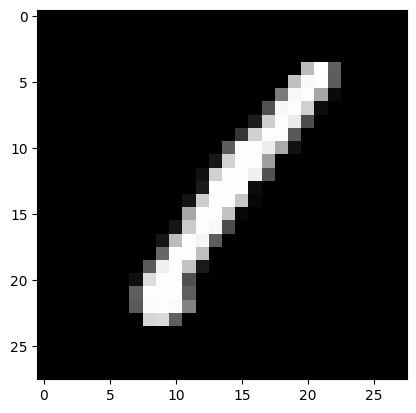

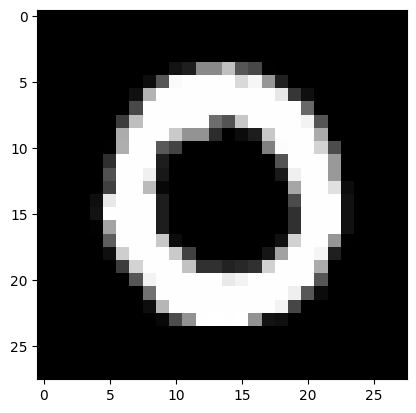

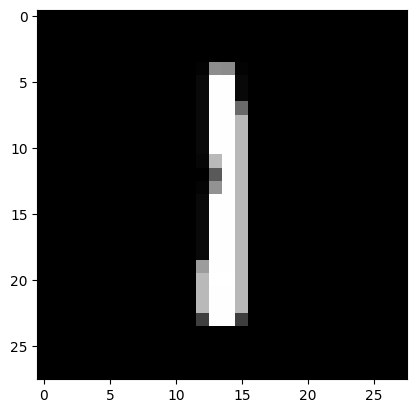

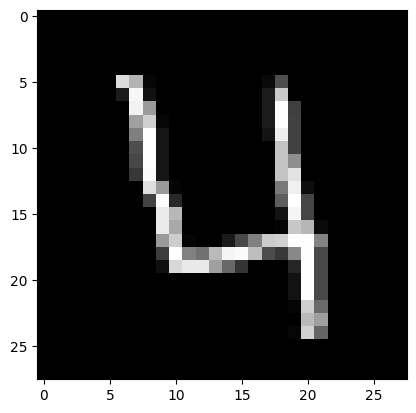

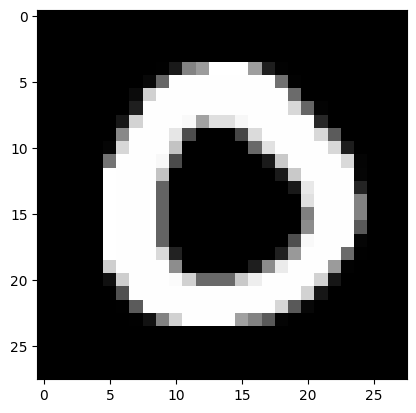

In [11]:
#10 visualise the image of first five digital in x ans also print the class label in

images = X.iloc[:5].values.reshape(-1, 28, 28)

for i in range(5):
    plt.imshow(images[i], cmap='gray')
    plt.show()




In [12]:
#11 split the train dataset into 75% train set and 25% validation set
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val =train_test_split(X,Y,train_size=0.75,random_state=42)
print("X_train shape: ",X_train.shape)
print("Y train shape: ",Y_train.shape)
print("X val shape: ",X_val.shape)
print("y val shpae: ",Y_val.shape)

X_train shape:  (31500, 784)
Y train shape:  (31500,)
X val shape:  (10500, 784)
y val shpae:  (10500,)


In [13]:
#12 & 13 fit knn classifies trainin data
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
knn.fit(X_train,Y_train)


KNeighborsClassifier()

In [25]:
#14 predict the validation set results
#from sklearn.metrics import accuracy_score
Y_pred=knn.predict(X_val)
#accuracy=accuracy_score(Y_val,Y_pred)
#print("Accuracy: ",accuracy)

Accuracy:  0.9666666666666667


In [26]:
#15 print the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_val,Y_pred)
print("Confusion matrix")
print(cm)

Confusion matrix
[[1022    0    0    0    0    0    3    0    0    0]
 [   0 1143    0    0    0    0    3    0    0    0]
 [   9   17 1014    3    2    2    2   22    1    0]
 [   2    5    4 1110    0   10    2    6    5    7]
 [   2    7    0    0  993    0    3    1    0   18]
 [   2    2    0   19    1  861    9    0    1    3]
 [   8    2    0    0    0    2  997    0    1    0]
 [   0   26    2    0    2    0    0 1088    0   17]
 [   1   14    2   18    3   18    4    1  936    8]
 [   6    3    1   12   10    0    0   14    2  986]]


In [27]:
#16 printing classification report and accuracy
from sklearn.metrics import classification_report, accuracy_score
report = classification_report(Y_val,Y_pred)
print("classification report")
print(report)


classification report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1025
           1       0.94      1.00      0.97      1146
           2       0.99      0.95      0.97      1072
           3       0.96      0.96      0.96      1151
           4       0.98      0.97      0.98      1024
           5       0.96      0.96      0.96       898
           6       0.97      0.99      0.98      1010
           7       0.96      0.96      0.96      1135
           8       0.99      0.93      0.96      1005
           9       0.95      0.95      0.95      1034

    accuracy                           0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500



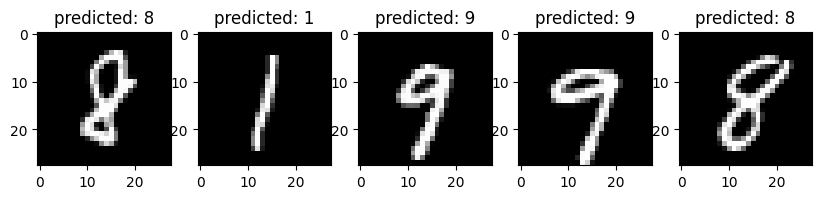

In [29]:
#17 visualise the image of first 5-digits in X-test and also print the predicted
images=X_val.iloc[:5].values.reshape(-1,28,28)
fig, axes=plt.subplots(1,5, figsize=(10,5))
for i in range(5):
  axes[i].imshow(images[i], cmap='gray')
  axes[i].set_title(f"predicted: {Y_pred[i]}")
plt.show()